In [1]:
#Importing the required libraries
import numpy as np  # linear algebra

In [2]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import ast

In [127]:
from sklearn.preprocessing import MultiLabelBinarizer

Importing the dataset that is to be analysed

In [128]:
data = pd.read_csv('movies.csv', encoding='ISO-8859-1')

In [129]:
data = data[~data['overview'].isna()]

In [130]:
data.columns # Shows the number of features present in the movies.csv dataset file

Index(['genres', 'homepage', 'id', 'keywords', 'original_title', 'overview',
       'production_companies', 'production_countries', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [131]:
# which rows actually have genres and not a blank list
has_genres_mask = data['genres'] != '[]'

In [132]:
genres = data['genres'][has_genres_mask]

In [133]:
genres.head(10)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
5    [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...
6    [{"id": 16, "name": "Animation"}, {"id": 10751...
7    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
8    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
9    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [134]:
def to_labels(genres_list):
    genres_list = ast.literal_eval(genres_list)
    return [g['name'] for g in genres_list]

Bringing the genres to 8 genres

Action,
Adventure
Fantasy
Science
Fiction
Crime
Drama
Thriller

In [135]:
genres_strings = genres.apply(to_labels)

In [136]:
genres_strings.head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [137]:
labeler = MultiLabelBinarizer()

In [138]:
labeler.fit(genres_strings)
#A set of labels (any orderable and hashable object) for each genre. If the classes parameter is set, genres will not be iterated.

MultiLabelBinarizer(classes=None, sparse_output=False)

In [139]:
labeler.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [140]:
X = data['overview'][has_genres_mask]
y = labeler.transform(genres_strings)

X.shape, y.shape

((4755,), (4755, 20))

4758 movies distributed among 20 genres

In [141]:
pd.DataFrame(y, columns=labeler.classes_).corr() 
#Compute pairwise correlation of columns, excluding NA/null values.Minimum number of observations required per pair of columns to have a valid result.

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Action,1.000000,0.362317,-0.067958,-0.162332,0.149805,-0.076057,-0.212655,-0.097238,0.071720,-0.018678,0.022215,-0.077234,-0.090564,-0.050468,-0.191829,0.228162,-0.011152,0.266263,0.059019,0.054935
Adventure,0.362317,1.000000,0.194620,-0.072852,-0.093975,-0.060186,-0.220948,0.229799,0.234295,-0.024291,-0.014832,-0.119118,-0.068962,-0.044181,-0.118099,0.208297,-0.018255,-0.008531,0.021201,0.033391
Animation,-0.067958,0.194620,1.000000,0.084477,-0.093413,-0.034448,-0.180509,0.534346,0.132738,-0.007567,-0.046728,-0.079010,0.025357,-0.059639,-0.088621,0.012733,0.014592,-0.129777,-0.034062,-0.014628
Comedy,-0.162332,-0.072852,0.084477,1.000000,-0.087893,-0.082394,-0.221215,0.161503,0.021268,-0.017100,-0.131324,-0.153513,0.038754,-0.165681,0.180638,-0.116117,0.011833,-0.343433,-0.111994,-0.044932
Crime,0.149805,-0.093975,-0.093413,-0.087893,1.000000,-0.059023,0.054740,-0.128058,-0.107874,-0.006804,-0.046439,-0.077628,-0.049290,0.122192,-0.127101,-0.112895,-0.002436,0.305134,-0.058842,-0.012991
Documentary,-0.076057,-0.060186,-0.034448,-0.082394,-0.059023,1.000000,-0.127101,-0.030110,-0.047514,0.020569,0.011182,-0.048774,0.078824,-0.037346,-0.073307,-0.054166,-0.006258,-0.088839,-0.026844,-0.020069
Drama,-0.212655,-0.220948,-0.180509,-0.221215,0.054740,-0.127101,1.000000,-0.169866,-0.153594,0.053116,0.167946,-0.223391,0.036879,0.012879,0.186573,-0.206234,0.011799,-0.057424,0.118691,-0.016239
Family,-0.097238,0.229799,0.534346,0.161503,-0.128058,-0.030110,-0.169866,1.000000,0.248018,-0.005269,-0.068332,-0.119148,0.042557,-0.081692,-0.076445,0.001551,0.035462,-0.198727,-0.061101,-0.029936
Fantasy,0.071720,0.234295,0.132738,0.021268,-0.107874,-0.047514,-0.153594,0.248018,1.000000,-0.026450,-0.064451,0.016959,-0.020595,-0.033367,-0.028556,0.086377,-0.012795,-0.082732,-0.041877,-0.029587
Foreign,-0.018678,-0.024291,-0.007567,-0.017100,-0.006804,0.020569,0.053116,-0.005269,-0.026450,1.000000,0.020209,-0.029673,-0.017075,-0.023810,0.016710,-0.030153,-0.003484,-0.034305,-0.000329,-0.011172


In [4]:
import matplotlib.pyplot as plt

In [5]:
#ou may be wondering why the x-axis ranges from 0-15 and the y-axis from 0. 
#If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0,
#the default x vector has the same length as y but starts with 0. Hence the x data are [0,1,2,3].

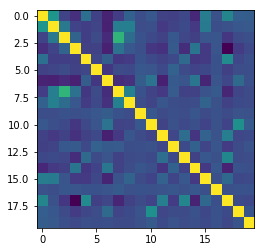

In [143]:
plt.imshow(pd.DataFrame(y).corr())


In [144]:
top = sorted(list(zip(y.sum(axis=0), labeler.classes_)))[::-1]
# re-arrange the array of genres by column value greatest to least

In [145]:
top

[(2289, 'Drama'),
 (1719, 'Comedy'),
 (1270, 'Thriller'),
 (1147, 'Action'),
 (893, 'Romance'),
 (785, 'Adventure'),
 (694, 'Crime'),
 (533, 'Science Fiction'),
 (518, 'Horror'),
 (511, 'Family'),
 (421, 'Fantasy'),
 (347, 'Mystery'),
 (231, 'Animation'),
 (195, 'History'),
 (185, 'Music'),
 (143, 'War'),
 (108, 'Documentary'),
 (81, 'Western'),
 (34, 'Foreign'),
 (8, 'TV Movie')]

In [146]:
#getting the top genres from the "top"
top_genres =sorted([t[1] for t in top][1:10])
top_genres

['Action',
 'Adventure',
 'Comedy',
 'Crime',
 'Family',
 'Horror',
 'Romance',
 'Science Fiction',
 'Thriller']

In [147]:
#Example : Drama class is not present in the top_genres, so it will be ignored
top_labeler = MultiLabelBinarizer(classes=top_genres)
top_labeler.fit(genres_strings)
top_labeler.transform([['this is a' ,'Horror']])


C:\Users\Amrit Raj Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['this is a'] will be ignored
  .format(sorted(unknown, key=str)))


array([[0, 0, 0, 0, 0, 1, 0, 0, 0]])

transforming the genres_string to contains only the top genres i.e 
it will excluded the 'Animation', 'Documentary', 'Drama', 'Fantasy', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Western']



In [148]:
y = top_labeler.transform(genres_strings)

C:\Users\Amrit Raj Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:935: UserWarning: unknown class(es) ['Animation', 'Documentary', 'Drama', 'Fantasy', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Western'] will be ignored
  .format(sorted(unknown, key=str)))


In [149]:
len(y.sum(axis=1)!=0), sum(y.sum(axis=1)!=0)

(4755, 4105)

In [150]:
no_labels_mask = y.sum(axis=1)==0
sum(no_labels_mask),len(no_labels_mask)

(650, 4755)

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(
    X[~no_labels_mask], y[~no_labels_mask], test_size=0.33, random_state=42)


In [153]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
counter = TfidfVectorizer(stop_words='english', lowercase=True, max_features=1000)
#removing the stopwords

In [155]:
#Using the MultiBomial Naives Classifer to classify the genre of the movie according to user's review

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [156]:
pipe = Pipeline(
    [
        ('text_transform', counter),
        ('predictor', MLPClassifier(warm_start=True, max_iter=5, hidden_layer_sizes=(10)))
#         ('predictor', RandomForestClassifier(class_weight='balanced'))
    ])

In [157]:
for i in range(200):
    pipe.fit(X_train, y_train)
    #print('epoc {0}, train {1:.3f}, test {2:.3f}'.format(i, 
                                                       #  pipe.score(X_train, y_train),
                                                         #pipe.score(X_test, y_test)))
    

C:\Users\Amrit Raj Singh\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [158]:
pipe.score(X_train,y_train)

0.5356363636363637

# Fit a naive bayes model to the training data.
# This will train the model using the word counts we computer, and the existing classifications in the training set.
nb = MultinomialNB()

In [159]:
pipe.score(X_test, y_test)

0.15276752767527677

In [160]:
def get_genres(text):
    print(pipe.predict_proba([text]))
    return top_labeler.classes_[pipe.predict([text]).ravel().astype('bool')]

get_genres('It was a scary movie')

[[0.03950543 0.00121127 0.97636458 0.01439395 0.01213858 0.0351385
  0.53484556 0.00194971 0.03274295]]


array(['Comedy', 'Romance'], dtype=object)